<a href="https://colab.research.google.com/github/kitkate8/BioPhysHW/blob/main/Homework/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **What is the likelihood of a substrate binding to enzymes dependent on their locations?** We will treat enzymes as stationary objects and a substrate that can bind to either enzyme as exihibiting random 1D brownian motion (i.e. you can treat it like a random walker). Assume that the distance between two enzymes is 8 steps and the substrate in between these two enzymes is 3 steps away from the enzyme on the left. Let's call the enzyme on the left enzyme 1 and the enzyme on the right enzyme 2.

What is the probability that the substrate binds to enzyme 1? Enzyme 2? What is the probability that the substrate never binds to either enzyme?

prob of binding to enzyme 1 is: 0.56
prob of binding to enzyme 2 is: 0.35


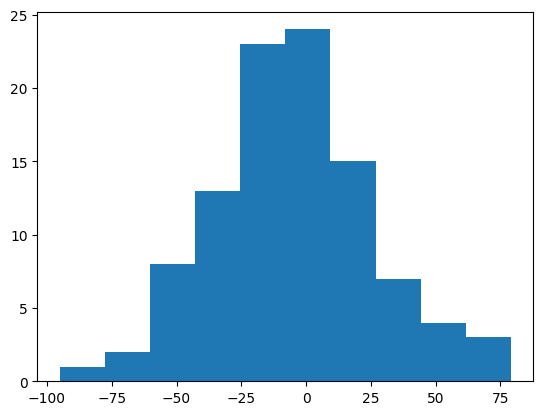

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt


def walk(steps):
  xpos = 0
  for i in range(steps - 1):
   x = random.randint(0,1)
   if x == 0:
    xpos += 1
   else:
    xpos -= 1
  return xpos

nruns = 100
runs = []
count1 = 0
count2 = 0
count3 = 0
for i in range(nruns):
 b = walk(1000)
 if b <= -3:
  count1 = count1 + 1
 if b >= 5:
  count2 = count2 + 1
 runs.append(b)
plt.hist(runs)

prob_1 = count1 / nruns
prob_2 = count2 / nruns

print("prob of binding to enzyme 1 is:", prob_1)
print("prob of binding to enzyme 2 is:", prob_2)


There is zero chance that the substrate never binds, because if it keeps walking forever it'll eventually hit one of the enzymes. The probability of binding to enzyme 1 is 5/8 and the probability of binding to enzyme 2 is 3/8.

2. **How long does it take a neurotransmitter to diffuse across a synapse?** A neurotransmitter, which is usually a small molecule like acetylcholine, is released from one neuron and must travel across a synapse (the space between two neurons) to reach a recieving neuron. This is part of how signals are propagated across neurons in your brain!
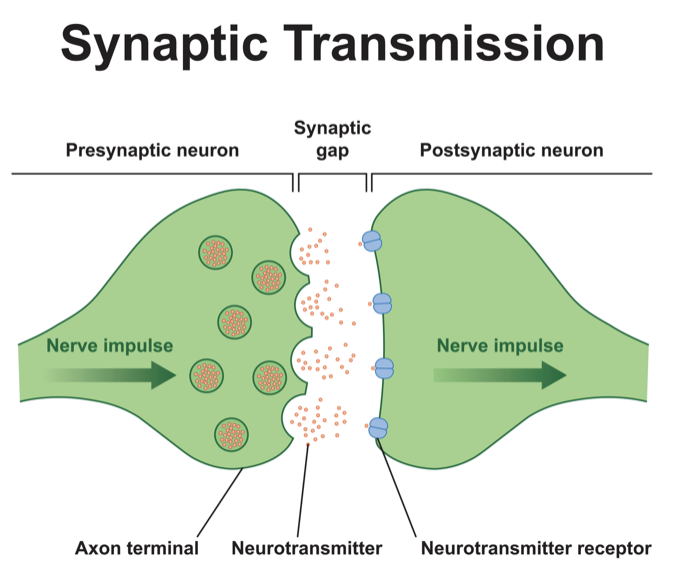

You will create a model, treating the neurotransmitter like a random walker, that allows you to calculate how long, on average, it takes a neurotransmitter to travel from the sending neuron to the recieving neuron across a synapse. I am intentially not going to give you a lot of direction because I want you to build the model on your own as if you were the first researcher studying this phenomenon! There are a few facts that I will give you to get you started though:

a. The time $t$ it takes for a particle to diffuse a given distance $L$ scales as $t = \frac{L^2}{D}$ where D is the diffusion constant that you can take to be $500 \mu m^2/s$. The length of a synapse is about 30nm. Assume a single random walk step takes $1ns$.

b. Once a neurotransmitter is released, it cannot be absorbed back by the sending neuron. You do not have to model any sort of collision kinematics here, just establish a simple random walker rule for what would happen if your neurotransmitter goes back to the sending neuron.


In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt

# needs to take 42 steps to reach the other side

steps = 100


def walking(xint):
  xpos = xint
  stepcount = 0
  while True:
   stepcount = stepcount + 1
   x = random.randint(0,1)
   if x == 0:
    xpos += 1
   else:
    xpos -= 1
   if xpos == -1:
    xpos = 0 #resets the transmitter back to start
   if xpos == 42:
    t_total =  stepcount
    break # ends loop when the transmitter is received
  return t_total

runs = 1000
times = []
for i in range(runs):
  t = walking(0)
  times.append(t)

average = sum(times) / len(times)
print(average, "ns")



1843.382 ns


3. **Lévy flight**. Take an animal foraging for food.  A squirrely will stay within a small space in search of food, and then when it believes enough of the area has been searched, it will go in a random direction for a certain period, then begin foraging again.  Similarly, sharks follow random Brownian motion when they are searching for food; however, if they cannot find any, they exhibit Lévy flight behavior, mixing short random movements with long trajectories.  By the way, researchers discovered this by following a group of radio-tagged sharks for 5,700 days, collecting about 12 million movements (more here: https://www.nature.com/articles/nature09116).

Lévy flight behavior is modeled as a random walker whose step sizes are variable. Given the description in the paragraph above for Lévy flight behavior, how would you model this behavior? *Do not google what Lévy flight is or how to code it up - I'd like you all to think for yourselves about it. I would rather get a room full of wrong but original and thoughtful answers than a room full of correct ones that have been googled.* Write a code that plots the trajectory of your model of Lévy flight.

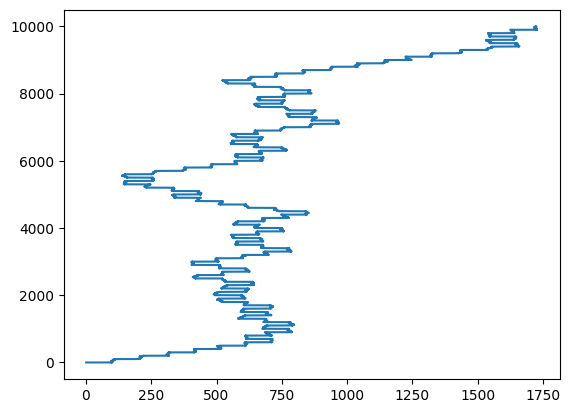

In [26]:

import random
import numpy as np
import matplotlib.pyplot as plt

def levy(steps, bigstep, ipos):
  pos = [ipos]
  steps_list = np.arange(steps)
  for i in range(steps -1):
   x = random.randint(0,1)
   if steps_list[i] % 100 == 0:
    step = bigstep if x == 0 else -bigstep
   else:
     step = 1 if x == 0 else -1
   xpos = pos[i] + step
   pos.append(xpos)
  return pos, steps_list

position, steps = levy(10000, 100, 1)
plt.plot(position, steps)

